In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
df = pd.read_csv("CC GENERAL.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.drop(["CUST_ID"], axis = 1, inplace = True)
df.fillna(method ='ffill', inplace = True) 
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [9]:
df1 = pd.DataFrame(data = scaled)

In [11]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)
df2

array([[-1.680592  , -1.07744689],
       [-1.14087619,  2.50596275],
       [ 0.97032813, -0.38210962],
       ...,
       [-0.92363834, -1.81049943],
       [-2.33495236, -0.65813666],
       [-0.55482391, -0.39778836]])

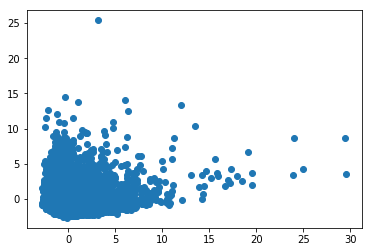

In [12]:
plt.scatter(df2[:, 0], df2[:, 1])

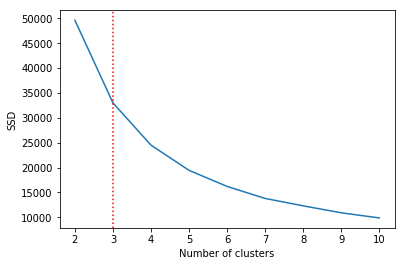

In [14]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

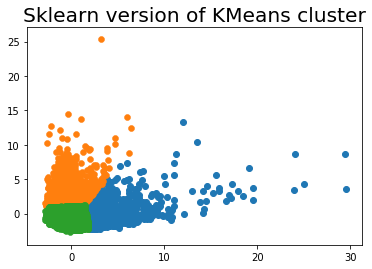

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of KMeans cluster")
    plt.style.use('fivethirtyeight')

In [16]:
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [17]:
dictlist[0]

[0, array([   6,   12,   21, ..., 8707, 8737, 8856], dtype=int32)]

In [22]:
df3 = df.values

In [24]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1], columns = ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1], columns = ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"])


In [26]:
print("*" * 75)
print("The Average Balance of Customers in cluster 1 is:")
print(cluster_1["BALANCE"].mean())
print("*" * 75)
print("The average CREDIT_LIMIT of customers in cluster 1 are:")
print(cluster_1["CREDIT_LIMIT"].mean())

***************************************************************************
The Average Balance of Customers in cluster 1 is:
2286.515531651844
***************************************************************************
The average CREDIT_LIMIT of customers in cluster 1 are:
7747.147651006711


In [27]:
## Final Report of Cluster 2
print("*" * 75)
print("The Average Balance of Customers in cluster 2 is:")
print(cluster_2["BALANCE"].mean())
print("*" * 75)
print("The average CREDIT_LIMIT of customers in cluster 2 are:")
print(cluster_2["CREDIT_LIMIT"].mean())

***************************************************************************
The Average Balance of Customers in cluster 2 is:
3921.526895386997
***************************************************************************
The average CREDIT_LIMIT of customers in cluster 2 are:
6601.136823889428


In [28]:
## Final Report of Cluster 3
print("*" * 75)
print("The Average Balance of Customers in cluster 3 is:")
print(cluster_3["BALANCE"].mean())
print("*" * 75)
print("The average CREDIT_LIMIT of customers in cluster 3 are:")
print(cluster_3["CREDIT_LIMIT"].mean())

***************************************************************************
The Average Balance of Customers in cluster 3 is:
788.8890582760152
***************************************************************************
The average CREDIT_LIMIT of customers in cluster 3 are:
3292.6631085063814


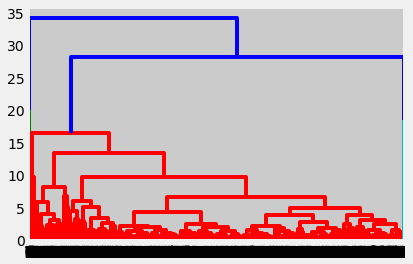

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


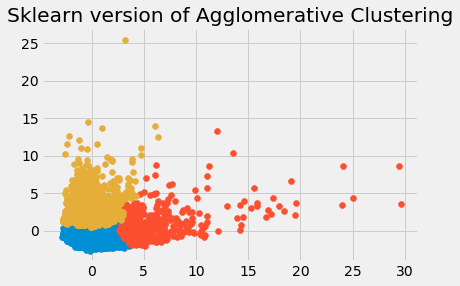

In [42]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Agglomerative Clustering")
    plt.style.use('fivethirtyeight')

#### It performs well on this dataset

0.17


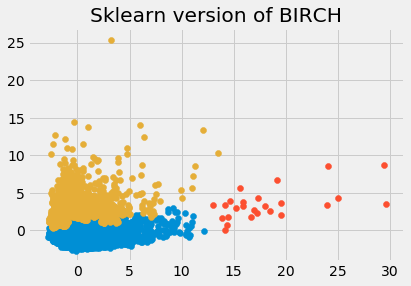

0.33


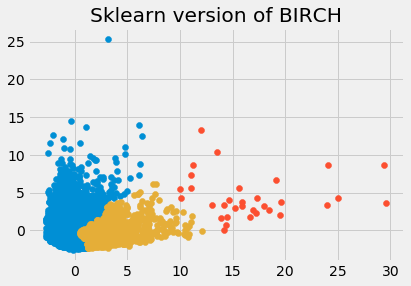

0.1


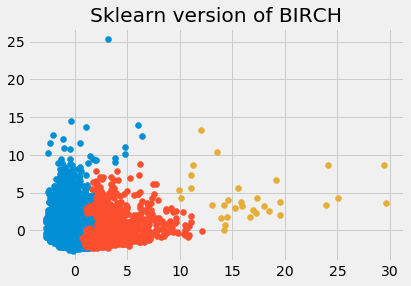

0.5


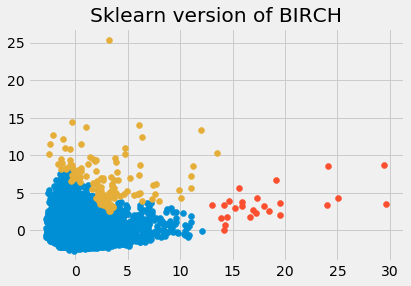

0.8


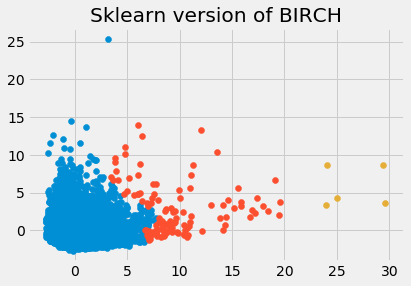

1


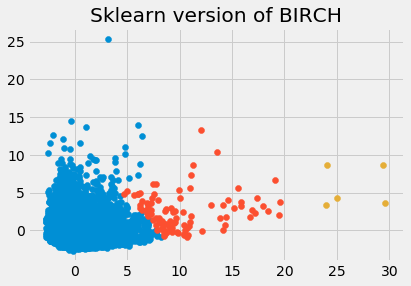

In [33]:
from sklearn.cluster import Birch
b = [0.17,0.33,0.1,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = Birch(threshold=v)
    model.fit(df2)
    yhat = model.predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of BIRCH")
        plt.style.use('fivethirtyeight')
    plt.show()

#### It creates 3 clusters. Performs very well for 0.33,0.17 and 0.5 threshold value.

0.17


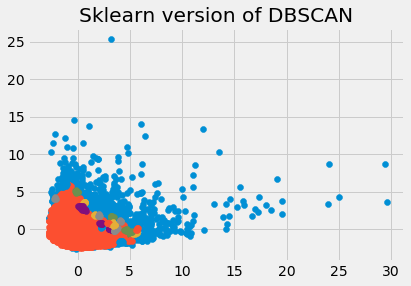

0.1


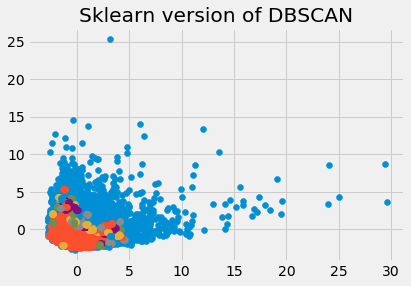

0.12


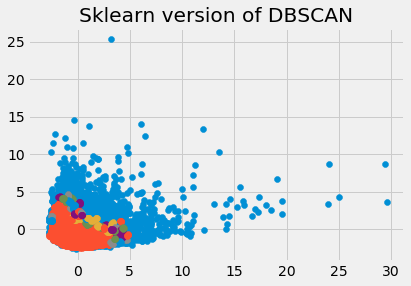

0.25


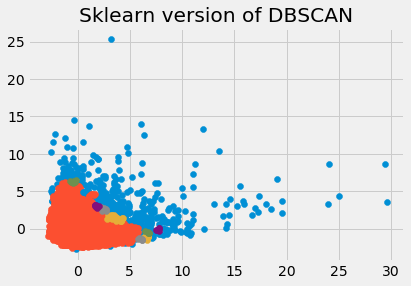

0.33


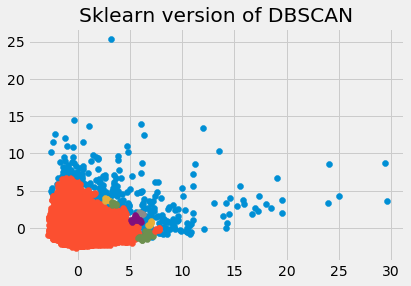

0.5


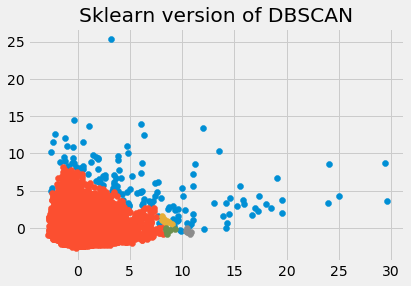

0.8


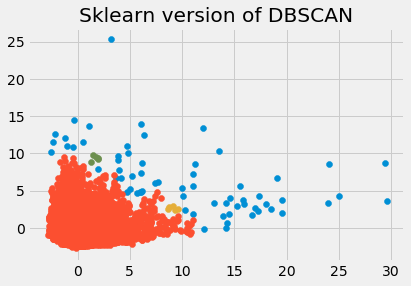

1


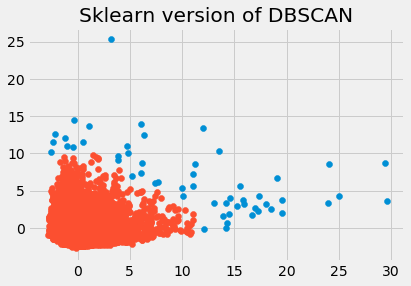

In [34]:
from sklearn.cluster import DBSCAN
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = DBSCAN(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of DBSCAN")
        plt.style.use('fivethirtyeight')
    plt.show()

#### DBSCAN perform good for 0.5 and 0.8 eps values. For other eps values it creates too many clusters.

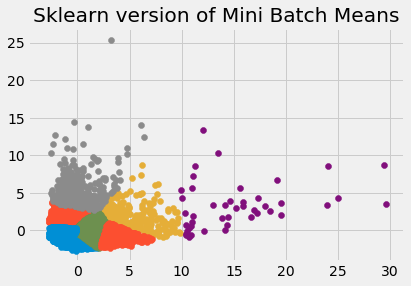

In [35]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans()
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means")
    plt.style.use('fivethirtyeight')

#### Minibatch creates 6 clusters too many clusters for this dataset.

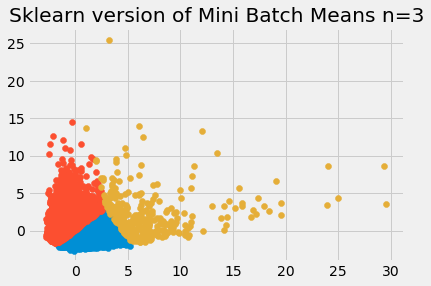

In [43]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=3)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means n=3")
    plt.style.use('fivethirtyeight')

0.17


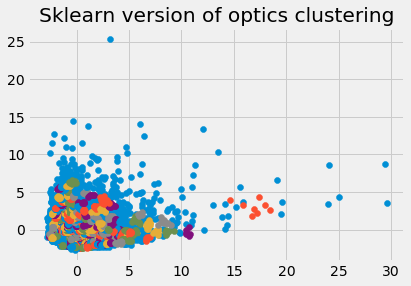

0.1


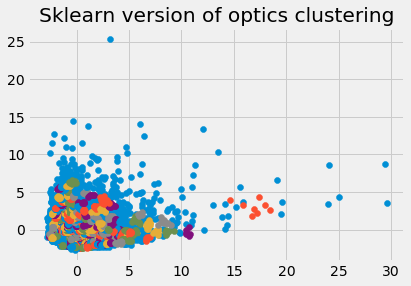

0.12


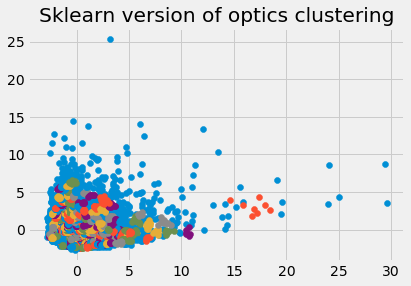

0.25


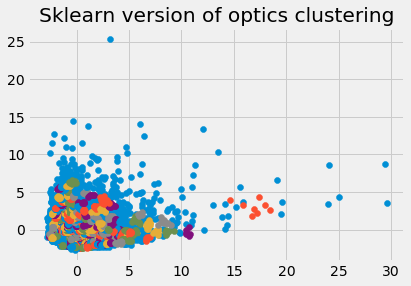

0.33


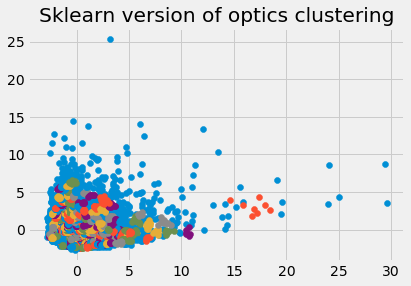

0.5


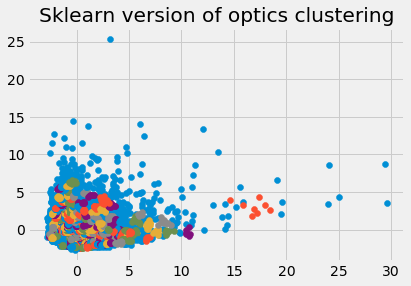

0.8


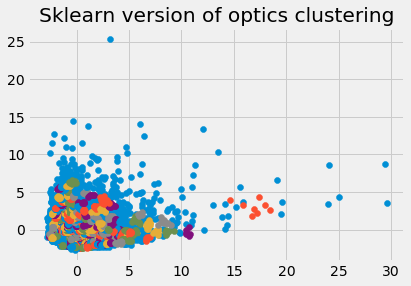

1


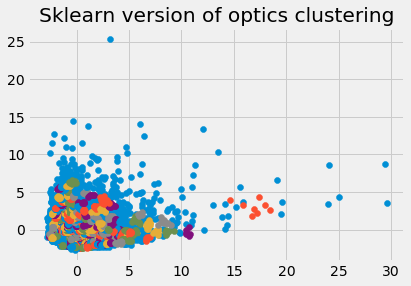

In [37]:
from sklearn.cluster import OPTICS
b = [0.17,0.1,0.12,0.25,0.33,0.5,0.8,1]
for i in range(len(b)):
    v = b[i]
    print(v)
    model = OPTICS(eps=v)
    yhat = model.fit_predict(df2)
    clusters = unique(yhat)
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
        plt.title("Sklearn version of optics clustering")
        plt.style.use('fivethirtyeight')
    plt.show()

#### Optics doesnot perform well on this dataset.

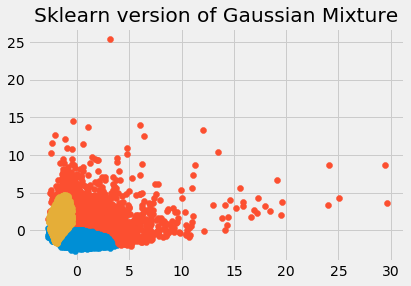

In [41]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 3)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Gaussian Mixture")
    plt.style.use('fivethirtyeight')

#### The performance is below average it overlaps the other class/misclassify.

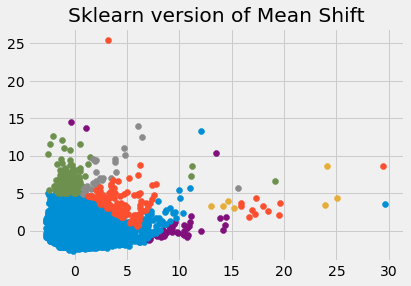

In [40]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df2, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth)
model.fit(df2)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Mean Shift")
    plt.style.use('fivethirtyeight')

#### It creates many clusters and all are spread over the graph.